In [20]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
json_path = "/content/user-wallet-transactions.json"

with open(json_path, "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,{'$oid': '681c85447b724ae36a6df5c9'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,1623421245,1623421245,repay,"{'type': 'Repay', 'amount': '19724448273', 'as...",0,{'$date': '2025-05-08T10:19:50.145Z'},{'$date': '2025-05-08T10:19:50.145Z'}
99996,{'$oid': '681c8d5b7b724ae36a70c446'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,1623558779,1623558779,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '200000...",0,{'$date': '2025-05-08T10:54:21.390Z'},{'$date': '2025-05-08T10:54:21.390Z'}
99997,{'$oid': '681c8d5b7b724ae36a70c62f'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,1623559191,1623559191,deposit,"{'type': 'Deposit', 'amount': '199401391185794...",0,{'$date': '2025-05-08T10:54:21.403Z'},{'$date': '2025-05-08T10:54:21.403Z'}
99998,{'$oid': '681c8d5b7b724ae36a70c752'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,1623559417,1623559417,borrow,"{'type': 'Borrow', 'amount': '4000000000', 'as...",0,{'$date': '2025-05-08T10:54:21.411Z'},{'$date': '2025-05-08T10:54:21.411Z'}


In [22]:
df["wallet"] = df["userWallet"]
df["action"] = df["action"]

In [23]:
usd_values = []
for i, row in df.iterrows():
    if row["actionData"]["amount"] and row["actionData"]["assetPriceUSD"]:
        amt = float(row["actionData"]["amount"])
        price = float(row["actionData"]["assetPriceUSD"])
        usd = amt * price
    else:
        usd = 0.0
    usd_values.append(usd)

df["usd_value"] = usd_values


In [24]:
df["usd_value"]

,usd_value
0,1.987664e+09
1,2.856945e+20
2,9.223773e+14
3,4.229933e+15
4,5.026161e+05
...,...
99995,1.976766e+10
99996,4.684078e+21
99997,4.670059e+21
99998,4.007604e+09


In [25]:
df["date"] = pd.to_datetime(df["timestamp"], unit="s").dt.date
df['date']

,date
0,2021-08-17
1,2021-05-20
2,2021-07-24
3,2021-07-31
4,2021-04-19
...,...
99995,2021-06-11
99996,2021-06-13
99997,2021-06-13
99998,2021-06-13


In [26]:
grouped = df.groupby("userWallet")

In [27]:
wallet_records = []

for wallet, group in grouped:
    rec = {}
    rec["wallet"] = wallet
    rec["tx_count"] = len(group)
    rec["num_deposit"] = (group["action"] == "deposit").sum()
    rec["num_borrow"] = (group["action"] == "borrow").sum()
    rec["num_repay"] = (group["action"] == "repay").sum()
    rec["num_redeem"] = (group["action"] == "redeemunderlying").sum()
    rec["num_liquidationcall"] = (group["action"] == "liquidationcall").sum()
    rec["total_deposit_usd"] = group.loc[group["action"] == "deposit", "usd_value"].sum()
    rec["total_borrow_usd"] = group.loc[group["action"] == "borrow", "usd_value"].sum()
    rec["total_repay_usd"] = group.loc[group["action"] == "repay", "usd_value"].sum()
    rec["total_redeem_usd"] = group.loc[group["action"] == "redeemunderlying", "usd_value"].sum()
    rec["total_liquidation_usd"] = group.loc[group["action"] == "liquidationcall", "usd_value"].sum()
    rec["avg_txn_value_usd"] = group["usd_value"].mean() if len(group) > 0 else 0.0
    rec["active_days"] = group["date"].nunique()

    wallet_records.append(rec)

wallet_df = pd.DataFrame(wallet_records)

In [28]:
len(wallet_df)

3497

In [29]:
wallet_df.drop(columns=['wallet']).corr()["num_deposit"].sort_values(ascending=False)

,num_deposit
num_deposit,1.000000
active_days,0.836689
num_borrow,0.781653
num_repay,0.712092
tx_count,0.243679
total_deposit_usd,0.167231
total_borrow_usd,0.155977
total_redeem_usd,0.097229
num_liquidationcall,0.075681
total_repay_usd,0.069439


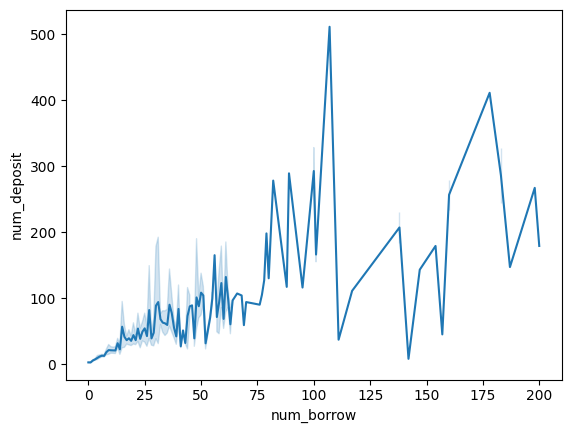

In [30]:
import seaborn as sns
sns.lineplot(x="num_borrow",y='num_deposit',data=wallet_df)
plt.show()

<Axes: xlabel='active_days', ylabel='tx_count'>

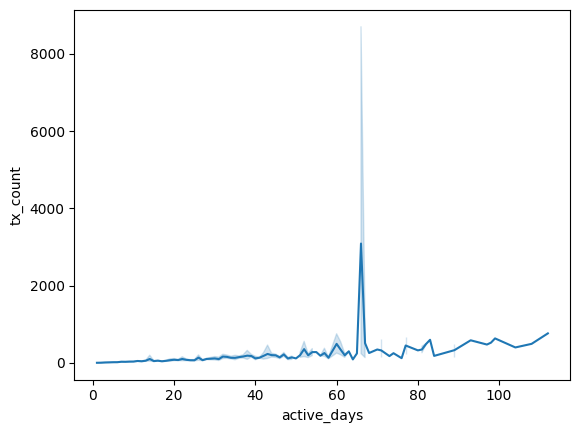

In [31]:
sns.lineplot(x="active_days",y="tx_count",data=wallet_df)

In [32]:
#I have defined my own criteria for getting the credit value from the existing historical data

scores = []

for i, row in wallet_df.iterrows():
    score = 500


    if row["num_liquidationcall"] == 0:
        score += 200

    if row["total_borrow_usd"] > 0:
        repay_ratio = row["total_repay_usd"] / row["total_borrow_usd"]
    else:
        repay_ratio = 1.0

    if repay_ratio >= 0.9:
        score += 200

    if row["active_days"] > 30:
        score += 100

    if row["total_deposit_usd"] > 10000:
        score += 100

    if row["num_liquidationcall"] > 0:
        score -= 200

    if repay_ratio < 0.5:
        score -= 100


    score = max(0, min(1000, score))
    scores.append(score)

wallet_df["actual_credit_score"] = scores

In [33]:
wallet_df

,wallet,tx_count,num_deposit,num_borrow,num_repay,num_redeem,num_liquidationcall,total_deposit_usd,total_borrow_usd,total_repay_usd,total_redeem_usd,total_liquidation_usd,avg_txn_value_usd,active_days,actual_credit_score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1,0,0,0,0,1.987664e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.987664e+09,1,1000
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1,0,0,0,0,2.856945e+20,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.856945e+20,1,1000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,2,0,0,0,0,5.152311e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.576155e+15,2,1000
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,0,0,0,17,0,0.000000e+00,0.000000e+00,0.000000e+00,9.803600e+20,0.0,5.766824e+19,8,900
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,250,15,4,130,0,2.065773e+23,6.029762e+22,7.015026e+10,1.128745e+23,0.0,9.517531e+20,104,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,1,0,0,0,0,9.871628e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,9.871628e+01,1,900
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,7,4,1,0,2,0,1.272592e+19,2.330736e+18,0.000000e+00,6.089061e+18,0.0,3.020817e+18,1,700
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,5,1,0,0,4,0,3.530977e+22,0.000000e+00,0.000000e+00,4.298987e+22,0.0,1.565993e+22,1,1000
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,22,13,2,2,5,0,6.793268e+21,1.202218e+09,1.998962e+08,7.926166e+20,0.0,3.448130e+20,11,700


In [34]:
X = wallet_df.drop(columns=["wallet", "actual_credit_score"])
y = wallet_df["actual_credit_score"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_test_scaled

array([[-0.07274589, -0.12240378, -0.05964594, ...,  0.        ,
        -0.07530087, -0.11626089],
       [-0.3257443 , -0.32324268, -0.31699989, ...,  0.        ,
        -0.00334697, -0.35947832],
       [-0.34062656, -0.32324268, -0.31699989, ...,  0.        ,
        -0.07577168, -0.4405508 ],
       ...,
       [-0.3257443 , -0.28976953, -0.31699989, ...,  0.        ,
        -0.07574809, -0.35947832],
       [-0.34062656, -0.32324268, -0.31699989, ...,  0.        ,
        -0.07576215, -0.4405508 ],
       [-0.22156848, -0.18935008, -0.18832291, ...,  0.        ,
         0.01781664, -0.35947832]])

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    optimizer="adam",
    loss='mse',
    metrics=['mae']
)

In [41]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 850840.1875 - mae: 909.6693 - val_loss: 868369.3750 - val_mae: 921.0878
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 834095.0000 - mae: 901.2267 - val_loss: 810512.0625 - val_mae: 888.9600
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 758547.2500 - mae: 857.2753 - val_loss: 652880.1875 - val_mae: 793.9897
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 569290.6250 - mae: 735.1635 - val_loss: 421869.2500 - val_mae: 632.4476
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 357664.0312 - mae: 571.5290 - val_loss: 207086.2656 - val_mae: 419.7852
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158709.1562 - mae: 355.6855 - val_loss: 99157.6719 - val_mae: 240.6396
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85226.6953 - mae: 212.7746 - val_loss: 77937.8047 - val_mae: 169.6498
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76836.2656 - mae: 171.6435 - val_l

In [42]:
losses=pd.DataFrame(model.history.history)

In [43]:
losses

,loss,mae,val_loss,val_mae
0,850771.812500,909.859802,868369.375000,921.087830
1,822587.875000,894.178406,810512.062500,888.959961
2,718734.250000,832.461182,652880.187500,793.989746
3,522687.906250,702.950928,421869.250000,632.447571
4,299987.875000,517.500916,207086.265625,419.785187
5,139958.359375,315.433411,99157.671875,240.639587
6,83484.125000,200.923386,77937.804688,169.649811
7,73614.195312,168.008270,73059.578125,162.445251
8,69271.992188,163.442612,68790.679688,158.103439
9,65231.628906,158.986191,64638.398438,152.824234


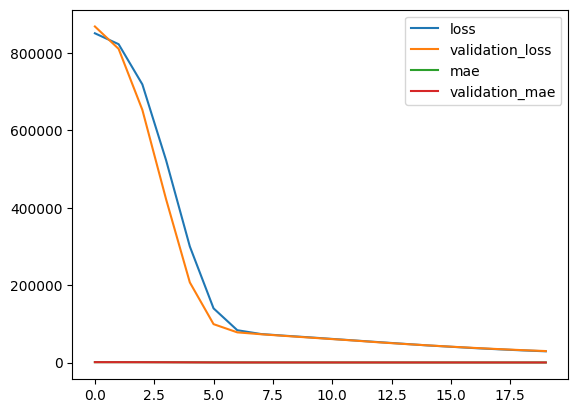

In [44]:
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='validation_loss')
plt.plot(losses['mae'],label='mae')
plt.plot(losses['val_mae'],label='validation_mae')
plt.legend()
plt.show()

In [45]:
X_all_scaled = scaler.transform(X)
predicted_scores = model.predict(X_all_scaled)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
predicted_scores

array([[986.6997 ],
       [986.2299 ],
       [979.81903],
       ...,
       [923.3499 ],
       [813.50366],
       [756.0579 ]], dtype=float32)

In [47]:
wallet_df["predicted_credit_score"] = predicted_scores

<Axes: ylabel='predicted_credit_score'>

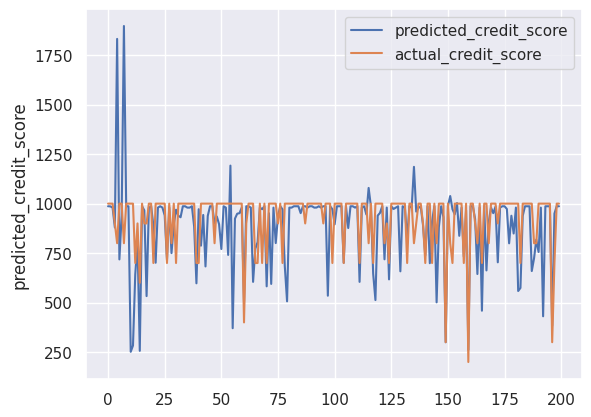

In [71]:
sns.set_theme(style="darkgrid")
sns.lineplot(wallet_df.iloc[:200]["predicted_credit_score"],label='predicted_credit_score')
sns.lineplot(wallet_df.iloc[:200]["actual_credit_score"],label='actual_credit_score')




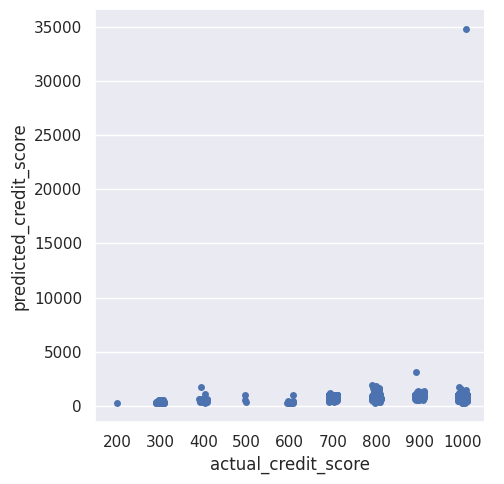

In [70]:
sns.set_theme(style="darkgrid")
sns.catplot(x="actual_credit_score",y="predicted_credit_score",data=wallet_df)

In [49]:
wallet_df

,wallet,tx_count,num_deposit,num_borrow,num_repay,num_redeem,num_liquidationcall,total_deposit_usd,total_borrow_usd,total_repay_usd,total_redeem_usd,total_liquidation_usd,avg_txn_value_usd,active_days,actual_credit_score,predicted_credit_score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1,0,0,0,0,1.987664e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.987664e+09,1,1000,986.699707
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1,0,0,0,0,2.856945e+20,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.856945e+20,1,1000,986.229919
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,2,0,0,0,0,5.152311e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.576155e+15,2,1000,979.819031
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,0,0,0,17,0,0.000000e+00,0.000000e+00,0.000000e+00,9.803600e+20,0.0,5.766824e+19,8,900,879.405518
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,250,15,4,130,0,2.065773e+23,6.029762e+22,7.015026e+10,1.128745e+23,0.0,9.517531e+20,104,800,1832.005981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,1,0,0,0,0,9.871628e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,9.871628e+01,1,900,986.699707
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,7,4,1,0,2,0,1.272592e+19,2.330736e+18,0.000000e+00,6.089061e+18,0.0,3.020817e+18,1,700,938.940491
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,5,1,0,0,4,0,3.530977e+22,0.000000e+00,0.000000e+00,4.298987e+22,0.0,1.565993e+22,1,1000,923.349915
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,22,13,2,2,5,0,6.793268e+21,1.202218e+09,1.998962e+08,7.926166e+20,0.0,3.448130e+20,11,700,813.503662


In [50]:
wallet_df.drop(columns='wallet').corr()['actual_credit_score'].sort_values(ascending=False)

,actual_credit_score
actual_credit_score,1.000000
predicted_credit_score,0.138985
avg_txn_value_usd,0.006799
total_redeem_usd,0.006125
total_repay_usd,0.004292
num_redeem,0.003433
total_deposit_usd,-0.014743
total_borrow_usd,-0.017363
tx_count,-0.031746
num_repay,-0.097226


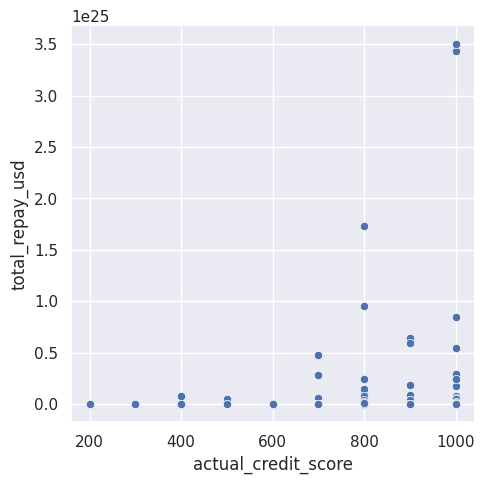

In [69]:
sns.set_theme(style="darkgrid")
sns.relplot(data=wallet_df, y="total_repay_usd", x="actual_credit_score")

<Axes: xlabel='num_liquidationcall', ylabel='count'>

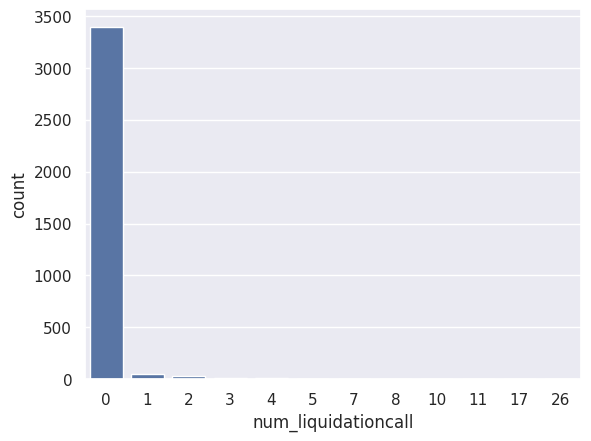

In [72]:
sns.set_theme(style="darkgrid")
sns.countplot(data=wallet_df, x="num_liquidationcall")

In [58]:

wallet_df[["wallet", "actual_credit_score", "predicted_credit_score"]].to_csv(
    "wallet_credit_scores.csv", index=False
)
